# 1. COLLECTED DATA
Avaibility data quantity and quality control 



### Init libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score

# avoid displaying warnings 
import warnings
warnings.filterwarnings("ignore")

### 1. Collect data

In [18]:
data = pd.read_csv("medical.csv", sep=';')


In [19]:
# Show first lines (head)
print(data.head(10))

           Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0        Influenza   Yes    No     Yes                  Yes   19  Female   
1      Common Cold    No   Yes     Yes                   No   25  Female   
2           Eczema    No   Yes     Yes                   No   25  Female   
3           Asthma   Yes   Yes      No                  Yes   25    Male   
4           Asthma   Yes   Yes      No                  Yes   25    Male   
5           Eczema   Yes    No      No                   No   25  Female   
6        Influenza   Yes   Yes     Yes                  Yes   25  Female   
7        Influenza   Yes   Yes     Yes                  Yes   25  Female   
8  Hyperthyroidism    No   Yes      No                   No   28  Female   
9  Hyperthyroidism    No   Yes      No                   No   28  Female   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2

In [20]:
# Informations about data type and length
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [21]:
# Checking all the missing value in the data 
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

### Cleaning and preparing the data
 

By Marina

#### 2. Cleaning


In [22]:
# Deleting duplicated data
df_cleaned = data.drop_duplicates(subset=["Fever", "Cough", "Fatigue", "Difficulty Breathing", "Age", "Gender", "Blood Pressure", "Cholesterol Level","Outcome Variable"])

In [23]:
# Checking result
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               251 non-null    object
 1   Fever                 251 non-null    object
 2   Cough                 251 non-null    object
 3   Fatigue               251 non-null    object
 4   Difficulty Breathing  251 non-null    object
 5   Age                   251 non-null    int64 
 6   Gender                251 non-null    object
 7   Blood Pressure        251 non-null    object
 8   Cholesterol Level     251 non-null    object
 9   Outcome Variable      251 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB


In [24]:
# A) Drop the missing values
df = df_cleaned.dropna()

In [25]:
# Drop Age and Gender (not needed)
df.drop ('Age', axis=1, inplace=True)
df.drop ('Gender', axis=1, inplace=True)
df.drop ('Outcome Variable', axis=1, inplace=True)

In [26]:
# B) Verify distributing disease
print("\n=== Distribution des maladies ===")
disease_counts = df['Disease'].value_counts()
print(f"Nombre de maladies uniques: {len(disease_counts)}")
print(f"Nombre moyen d'échantillons par maladie: {len(df)/len(disease_counts):.2f}")
print("\nTop 10 maladies les plus fréquentes:")
print(disease_counts.head(10))
 


=== Distribution des maladies ===
Nombre de maladies uniques: 99
Nombre moyen d'échantillons par maladie: 2.54

Top 10 maladies les plus fréquentes:
Disease
Asthma             16
Hypertension       10
Diabetes           10
Osteoporosis       10
Migraine            9
Bronchitis          7
Influenza           6
Common Cold         6
Liver Cancer        6
Gastroenteritis     6
Name: count, dtype: int64


In [27]:
MIN_SAMPLES = 5  # Minimum d'échantillons par maladie
frequent_diseases = disease_counts[disease_counts >= MIN_SAMPLES].index
df_filtered = df[df['Disease'].isin(frequent_diseases)].copy()

print(f"\nNombre de maladies après filtrage: {len(frequent_diseases)}")
print(f"Nombre d'échantillons après filtrage: {len(df_filtered)}")


Nombre de maladies après filtrage: 19
Nombre d'échantillons après filtrage: 136


### Formating data

In [28]:
print("\n=== Encodage des données ===")
# Convertir Yes/No en 1/0
df_filtered.replace({"Yes": 1, "No": 0}, inplace=True)

# Convertir Blood Pressure et Cholesterol Level en valeurs numériques
df_filtered["Blood Pressure"] = df_filtered["Blood Pressure"].map({"Low": 1, "Normal": 2, "High": 3})
df_filtered["Cholesterol Level"] = df_filtered["Cholesterol Level"].map({"Low": 1, "Normal": 2, "High": 3})

# Encoder la variable cible (Disease)
encoder_disease = LabelEncoder()
df_filtered["Disease"] = encoder_disease.fit_transform(df_filtered["Disease"])

# Encoder Outcome Variable
# encoder_outcome = LabelEncoder()
# df_filtered["Outcome Variable"] = encoder_outcome.fit_transform(df_filtered["Outcome Variable"])

# Vérifier que toutes les colonnes sont numériques
print("\nTypes des données après encodage:")
print(df_filtered.dtypes)


=== Encodage des données ===

Types des données après encodage:
Disease                 int64
Fever                   int64
Cough                   int64
Fatigue                 int64
Difficulty Breathing    int64
Blood Pressure          int64
Cholesterol Level       int64
dtype: object


In [29]:
#Verifying transformation of data
df_filtered.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level
0,10,1,0,1,1,1,2
1,3,0,1,1,0,2,2
3,1,1,1,0,1,2,2
5,6,1,0,0,0,2,2
6,10,1,1,1,1,2,2
8,9,0,1,0,0,2,2
10,1,1,0,0,1,3,2
11,0,0,1,1,0,2,1
13,3,0,0,0,0,1,2
14,5,0,0,0,0,1,2


In [30]:
# 2. Préparation des features et target
X = df_filtered.drop('Disease', axis=1)
y = df_filtered['Disease']

In [31]:
# 3. Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.15, 
    random_state=42,
    stratify=y
)

In [33]:
def evaluate_models(X_train, X_test, y_train, y_test):
    # Définition des modèles à tester
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'SVM': SVC(class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }
    
    # Dictionnaire pour stocker les résultats
    results = {}
    
    for name, model in models.items():
        print(f"\nÉvaluation du modèle: {name}")
        
        # Entraînement
        model.fit(X_train, y_train)
        
        # Prédictions
        y_pred = model.predict(X_test)
        
        # Métriques
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        
        print(f"Accuracy: {accuracy:.3f}")
        print(f"F1-score: {f1:.3f}")
        print("\nRapport de classification détaillé:")
        print(classification_report(y_test, y_pred))
    
    return results

In [34]:

# REGRESSION LOGIQUE 
modelregression = LogisticRegression(class_weight='balanced', max_iter=1000)
modelregression.fit(X_train, y_train)

# ASSESS
y_pred = modelregression.predict(X_test)
print(f"Précision : {accuracy_score(y_test, y_pred):.2f}")
print(f"Rapport de classification :\n{classification_report(y_test, y_pred)}")

Précision : 0.05
Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.25      1.00   

In [35]:
# RANDOM FOREST
rf_modelrandom = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

rf_modelrandom.fit(X_train, y_train)

# ASSESS 
y_pred = rf_modelrandom.predict(X_test)
print("\n=== Résultats du modèle Random Forest ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))



=== Résultats du modèle Random Forest ===
Accuracy: 0.048

Rapport de classification:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00     

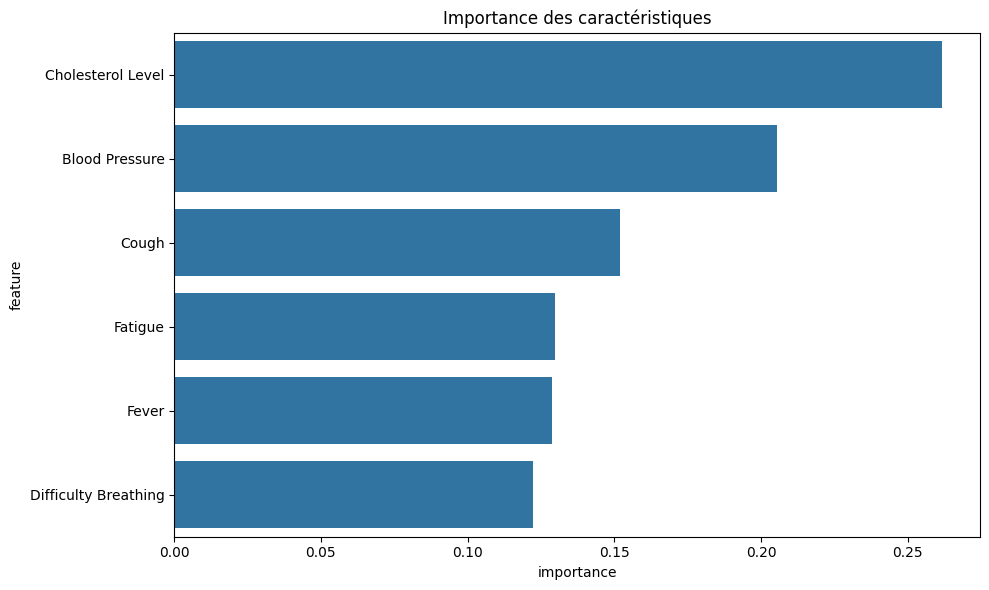

In [36]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_modelrandom.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Importance des caractéristiques")
plt.tight_layout()
plt.show()

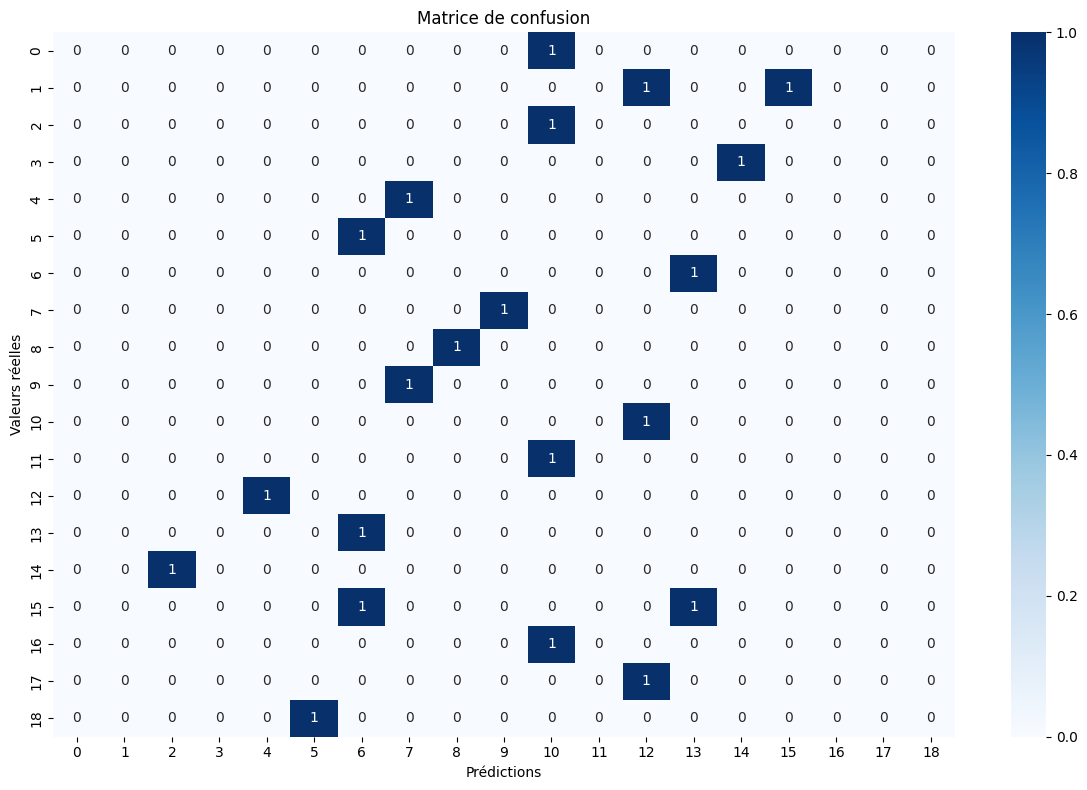

In [37]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.tight_layout()
plt.show()

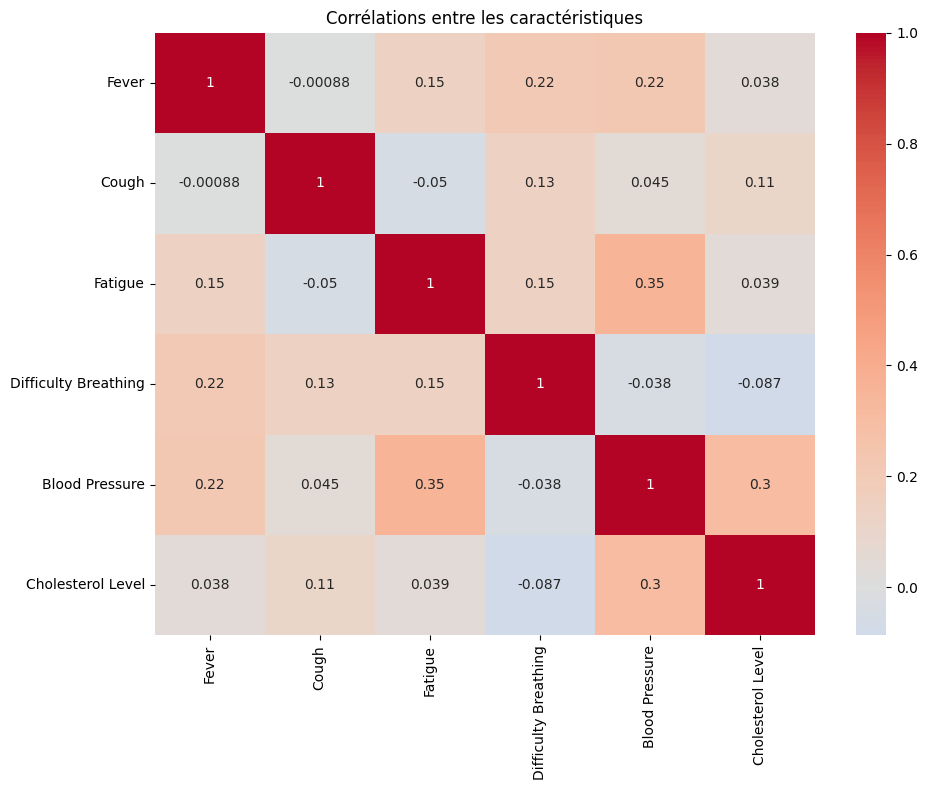

In [38]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations entre les caractéristiques')
plt.tight_layout()
plt.show()

In [39]:
# DECISION TREE
modeldecisiontree = DecisionTreeClassifier()
modeldecisiontree.fit(X_train, y_train)

# ASSESS 
y_pred = modeldecisiontree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00    

In [40]:
# SVM
modelsvm = SVC()
modelsvm.fit(X_train, y_train)

# ASSESS
y_pred = modelsvm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.17      0.50      0.25         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00    

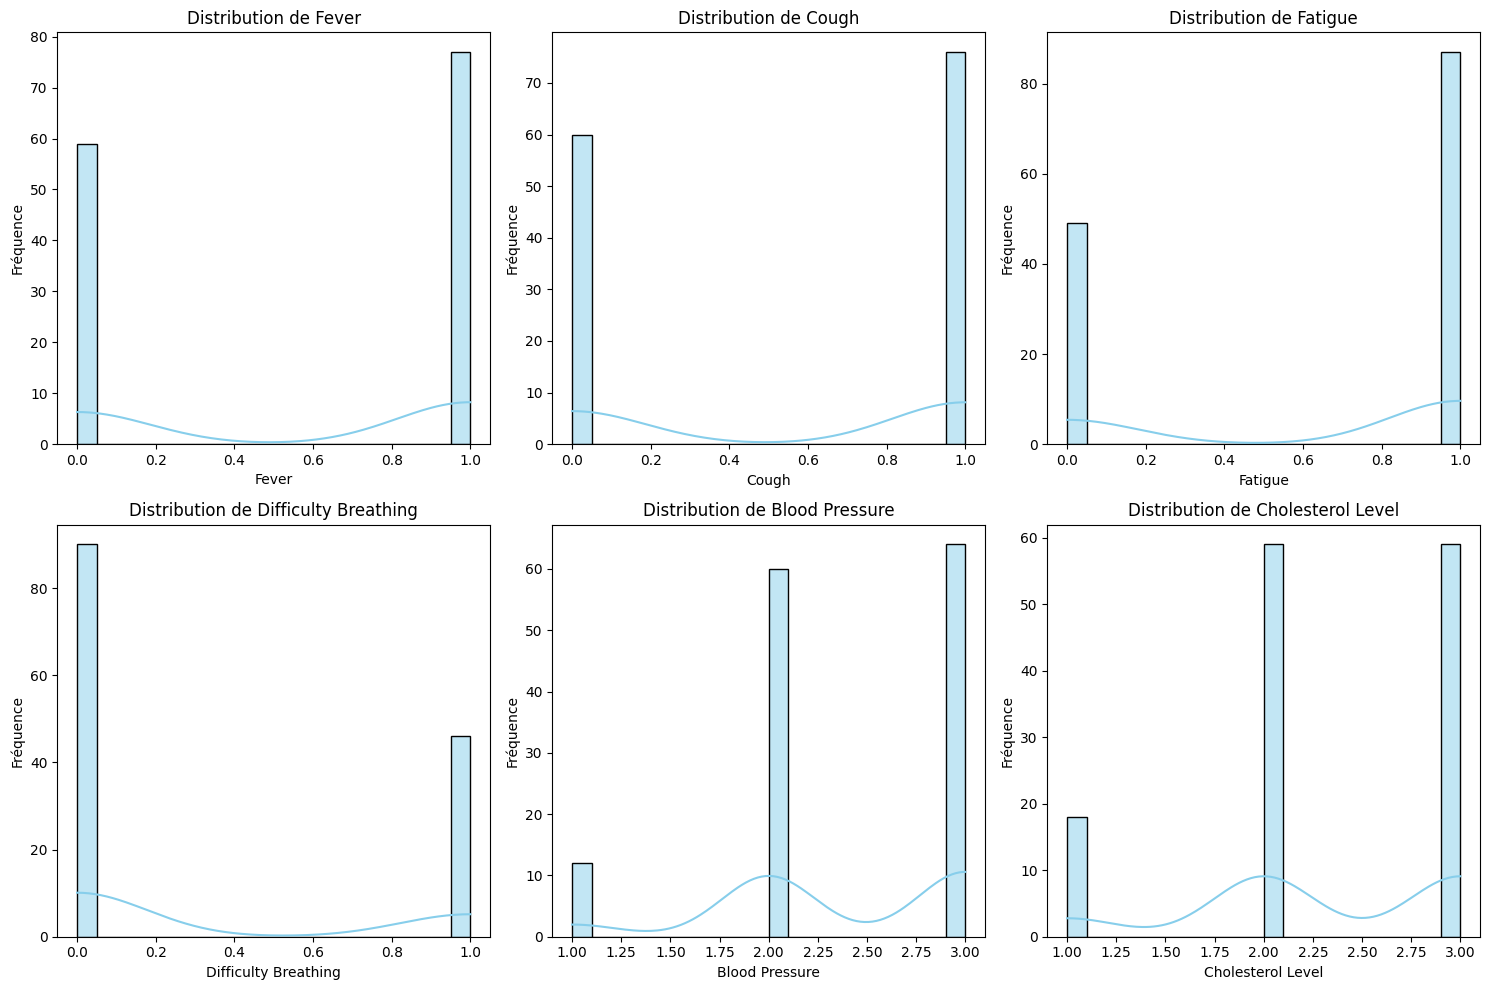

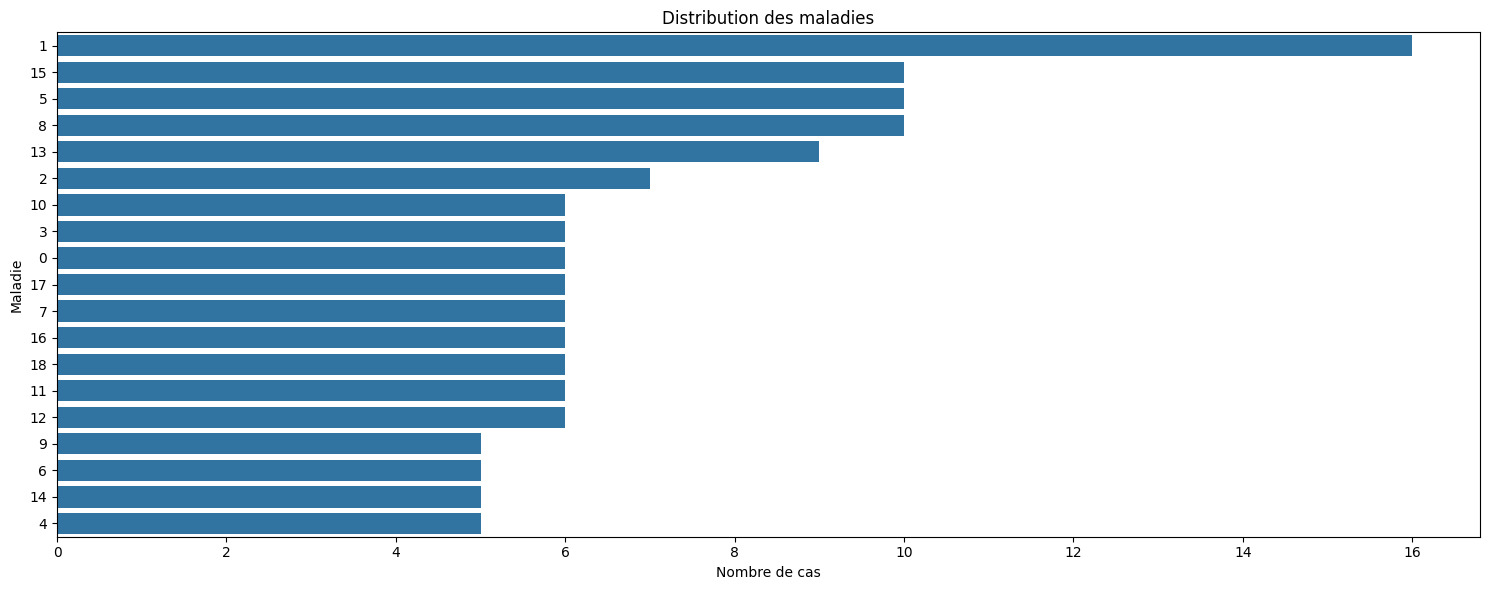

In [41]:
# Visualiser la distribution des caractéristiques
colonnes = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(colonnes):
    plt.subplot(2, 3, i + 1)  # Diviser en une grille de 2x3
    sns.histplot(data=df_filtered[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

# Ajuster la mise en page
plt.tight_layout()
plt.show()

# Visualiser la distribution des maladies
plt.figure(figsize=(15, 6))
sns.countplot(data=df_filtered, y='Disease', order=df_filtered['Disease'].value_counts().index)
plt.title("Distribution des maladies")
plt.xlabel("Nombre de cas")
plt.ylabel("Maladie")
plt.tight_layout()
plt.show()

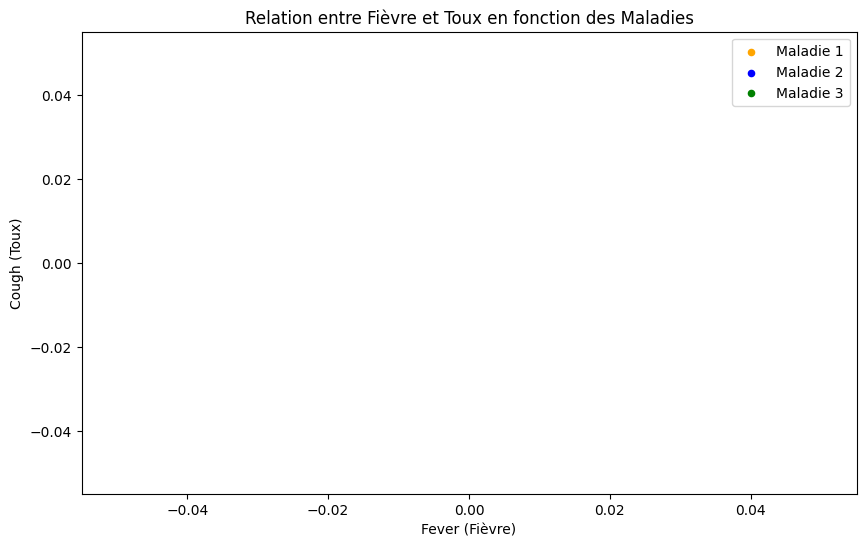

In [42]:
# Création d'une figure vide


# Créer une figure et obtenir un objet Axes
fig, ax = plt.subplots(figsize=(10, 6))  # Obtenir un objet Axes avec la taille de la figure

# Afficher les points pour la maladie 1
df[df['Disease'] == 1].plot(kind='scatter', x='Fever', y='Cough', color='orange', label='Maladie 1', ax=ax)

# Afficher les points pour la maladie 2
df[df['Disease'] == 2].plot(kind='scatter', x='Fever', y='Cough', color='blue', label='Maladie 2', ax=ax)

# Afficher les points pour la maladie 3
df[df['Disease'] == 3].plot(kind='scatter', x='Fever', y='Cough', color='green', label='Maladie 3', ax=ax)

# Ajuster les labels et le titre
ax.set_xlabel('Fever (Fièvre)')  # Axe X (Fièvre)
ax.set_ylabel('Cough (Toux)')  # Axe Y (Toux)
ax.set_title('Relation entre Fièvre et Toux en fonction des Maladies')  # Titre du graphique

# Affichage de la légende
plt.legend()

# Affichage du graphique
plt.show()